## Crop Recomendation system Using ML

In [89]:
# Importing necessary liabaries
import numpy as np   
import pandas as pd   
import matplotlib.pyplot as plt                 
import seaborn as sns   


In [90]:
# Loading the dataset
crop=pd.read_csv("CRS/dataset/Crop_recommendation (1).csv")

In [91]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [92]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [93]:
crop.shape

(2200, 8)

In [94]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [95]:
# To check missing values
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [96]:
# To check duplicate values
crop.duplicated().sum()

np.int64(0)

In [97]:
# TO check statistics of dataset
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [98]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [99]:
# Check target feature distribution
crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [100]:
crop.sort_values(by='N',ascending=False)

,N,P,K,temperature,humidity,ph,rainfall,label
1978,140,45,15,25.530827,80.046628,5.801048,99.395572,cotton
1912,140,38,15,24.147295,75.882986,6.021440,69.915635,cotton
1950,140,40,17,22.727672,77.075981,6.006086,77.551763,cotton
1928,139,35,15,25.248679,83.463015,5.898293,86.555178,cotton
1901,136,36,20,23.095956,84.862757,6.925412,71.295811,cotton
...,...,...,...,...,...,...,...,...
1184,0,36,26,34.130722,51.257862,5.101206,96.388080,mango
1641,0,23,15,22.566642,93.374889,7.598729,109.858575,orange
1635,0,12,7,20.184323,90.654585,6.969250,116.813097,orange
608,0,49,18,29.683617,87.935981,6.990095,41.824902,mungbean


In [101]:
crop.sort_values(by='P',ascending=False)

,N,P,K,temperature,humidity,ph,rainfall,label
1558,32,145,203,23.830537,90.844222,6.406819,109.596679,apple
1211,27,145,205,9.467960,82.293355,5.800243,66.027652,grapes
1594,35,145,195,22.039115,94.580758,6.231950,110.980401,apple
1284,28,145,202,19.207771,82.904284,6.484323,66.831137,grapes
1274,16,145,199,26.916248,80.768389,5.953966,69.309272,grapes
...,...,...,...,...,...,...,...,...
1877,40,5,32,26.070108,96.703622,5.981170,143.533473,coconut
1618,13,5,8,23.853404,90.105225,7.474711,103.923226,orange
1464,111,5,47,28.033065,91.473558,6.274453,21.179248,muskmelon
1465,111,5,52,29.884305,94.037115,6.135996,21.000099,muskmelon


In [102]:
crop.sort_values(by='K',ascending=False)

,N,P,K,temperature,humidity,ph,rainfall,label
1588,0,145,205,21.225034,90.098778,5.520783,113.976046,apple
1586,12,129,205,22.362383,91.157616,6.119432,118.683273,apple
1217,3,136,205,17.586294,80.848066,6.334771,71.406545,grapes
1225,24,140,205,12.087022,83.593987,5.932029,68.668134,grapes
1543,5,144,205,21.421772,92.626653,6.184923,102.804566,apple
...,...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436,orange
1695,27,30,5,32.717485,90.546083,7.656978,113.328978,orange
1679,13,22,5,19.667056,90.500967,7.764040,100.173796,orange
1673,5,8,5,11.033679,92.227068,6.562595,112.771592,orange


In [103]:
crop.sort_values(by='temperature',ascending=False)

,N,P,K,temperature,humidity,ph,rainfall,label
1743,59,62,52,43.675493,93.108872,6.608668,103.823566,papaya
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,papaya
1722,61,64,52,43.302049,92.834054,6.641099,110.562229,papaya
1750,37,52,47,43.080227,93.903057,6.542777,211.852906,papaya
1766,63,58,50,43.037143,94.642890,6.720744,41.585659,papaya
...,...,...,...,...,...,...,...,...
1295,23,138,200,9.851243,80.226317,5.965379,68.428024,grapes
1291,14,121,203,9.724458,83.747656,6.158689,74.464111,grapes
1293,32,138,197,9.535586,80.731127,5.908724,69.441152,grapes
1211,27,145,205,9.467960,82.293355,5.800243,66.027652,grapes


In [104]:
crop.sort_values(by='humidity',ascending=False)

,N,P,K,temperature,humidity,ph,rainfall,label
1889,40,22,29,27.558218,99.981876,5.735364,174.625648,coconut
1864,6,13,29,27.311557,99.969060,5.832608,201.825863,coconut
1892,3,9,35,26.916419,99.846716,6.318553,225.632366,coconut
1891,21,20,31,25.600337,99.724010,5.855458,165.824873,coconut
1814,19,15,34,26.296449,99.658092,5.685889,215.919505,coconut
...,...,...,...,...,...,...,...,...
296,48,65,78,17.437327,14.338474,7.861128,73.092670,chickpea
219,31,70,77,20.888187,14.323138,6.492546,90.462283,chickpea
270,42,74,83,19.258256,14.280419,7.545258,65.780420,chickpea
245,35,64,78,17.928459,14.273280,7.496645,85.373788,chickpea


In [105]:
crop.sort_values(by='ph',ascending=False)

,N,P,K,temperature,humidity,ph,rainfall,label
594,35,52,15,28.698413,61.147544,9.935091,65.675918,mothbeans
518,7,45,22,25.506346,44.830255,9.926212,74.326351,mothbeans
507,5,35,20,28.929526,53.570147,9.679241,66.356341,mothbeans
546,25,51,18,27.777995,54.821308,9.459493,50.284387,mothbeans
563,28,57,17,30.477577,61.582453,9.416003,61.866339,mothbeans
...,...,...,...,...,...,...,...,...
561,35,51,17,28.799292,49.842134,3.558823,40.855347,mothbeans
599,16,51,21,31.019636,49.976752,3.532009,32.812965,mothbeans
582,19,51,25,26.804744,48.239914,3.525366,43.878020,mothbeans
529,36,43,24,27.094006,43.653054,3.510404,41.537495,mothbeans


In [106]:
crop.sort_values(by='rainfall',ascending=False)

,N,P,K,temperature,humidity,ph,rainfall,label
43,82,40,40,23.830675,84.813601,6.271479,298.560117,rice
38,60,43,44,21.019447,82.952217,7.416245,298.401847,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
72,79,42,37,24.873007,82.840226,6.587919,295.609449,rice
19,88,35,40,23.579436,83.587603,5.853932,291.298662,rice
...,...,...,...,...,...,...,...,...
1454,95,21,47,27.931142,93.561614,6.431971,20.661278,muskmelon
1446,106,20,51,29.730197,90.970157,6.342573,20.490356,muskmelon
1463,84,29,49,29.943492,93.907412,6.251420,20.390205,muskmelon
1424,102,25,50,28.204808,92.914404,6.099662,20.360011,muskmelon


In [107]:
features=crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


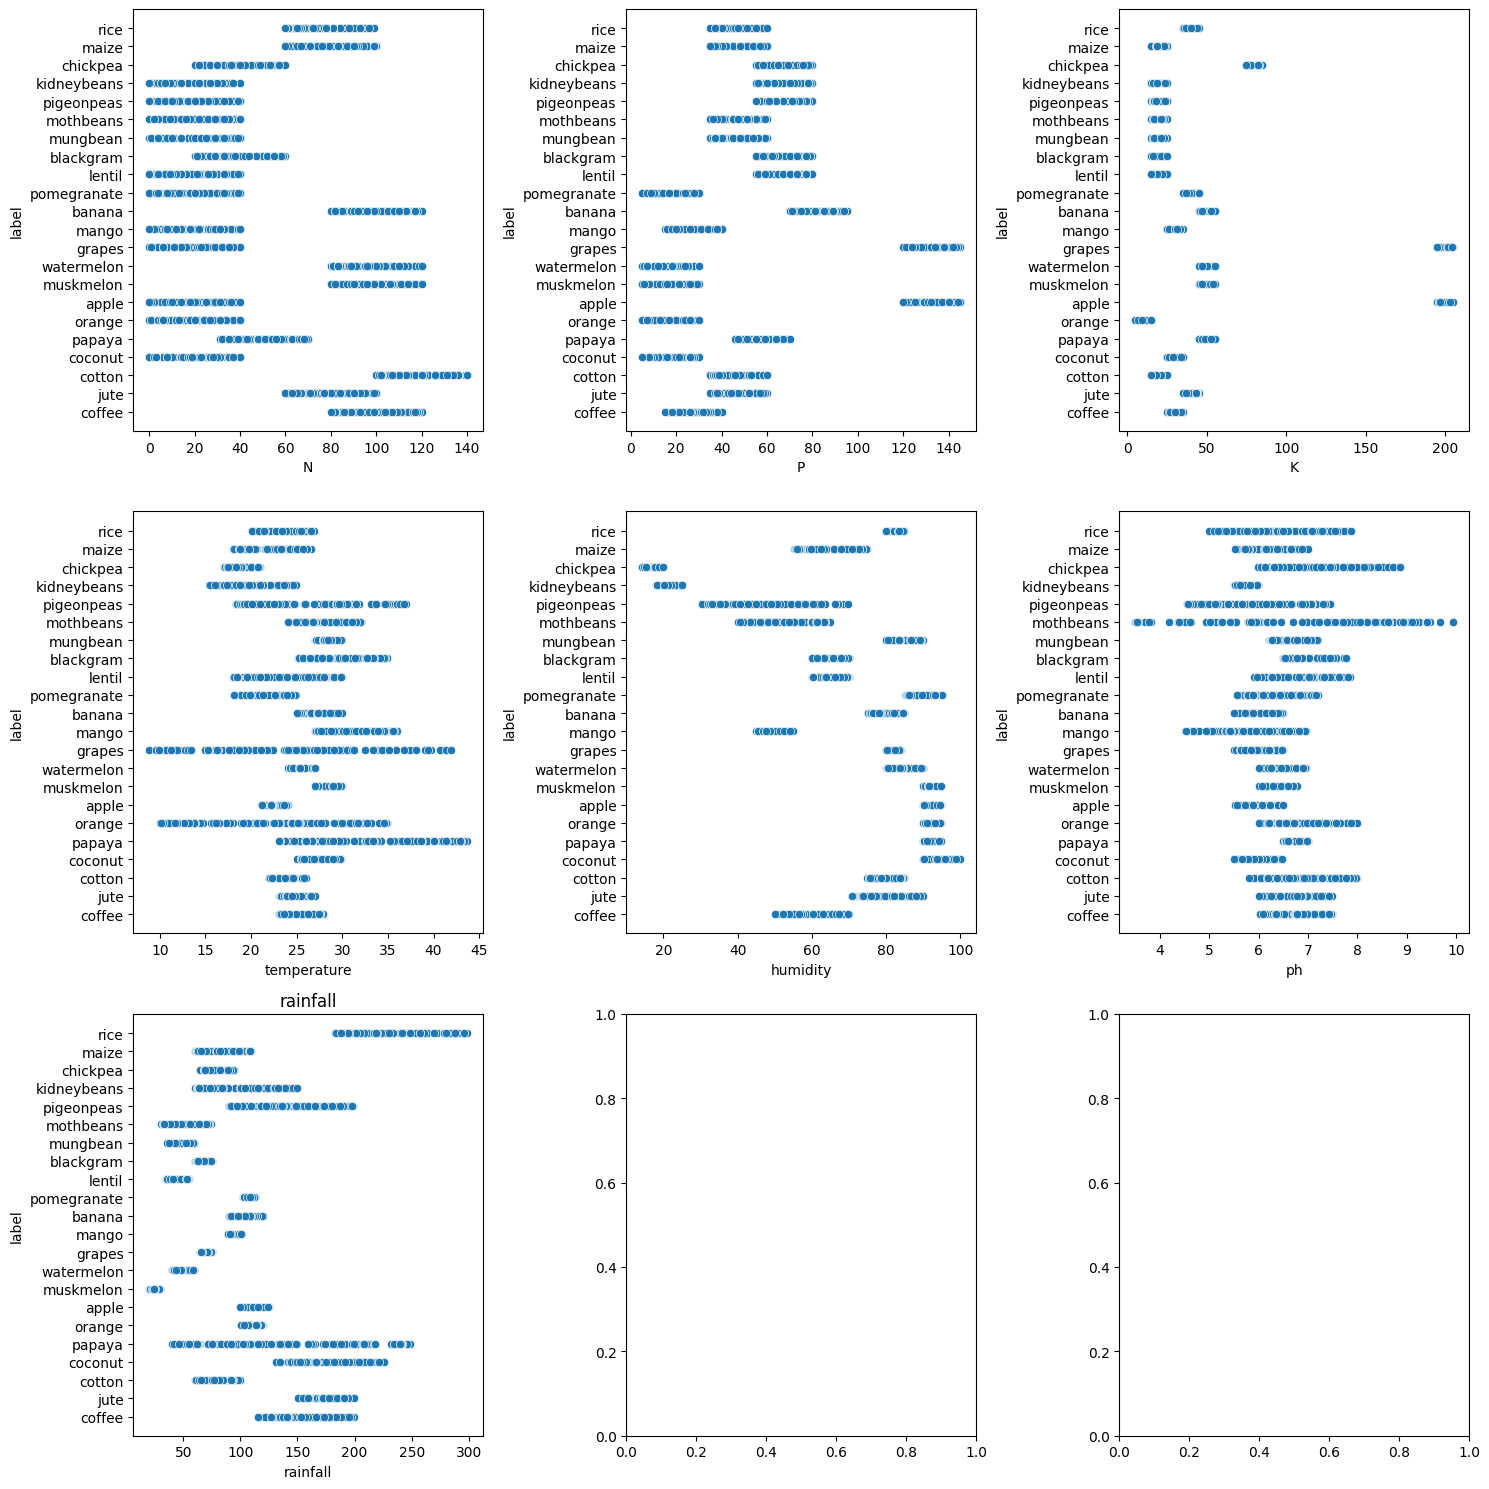

In [108]:
#plotting scatter plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
 sns.scatterplot(x=i ,y='label',data=crop, ax=subplot)
subplot.set_title(i)
plt.tight_layout()
plt.show()

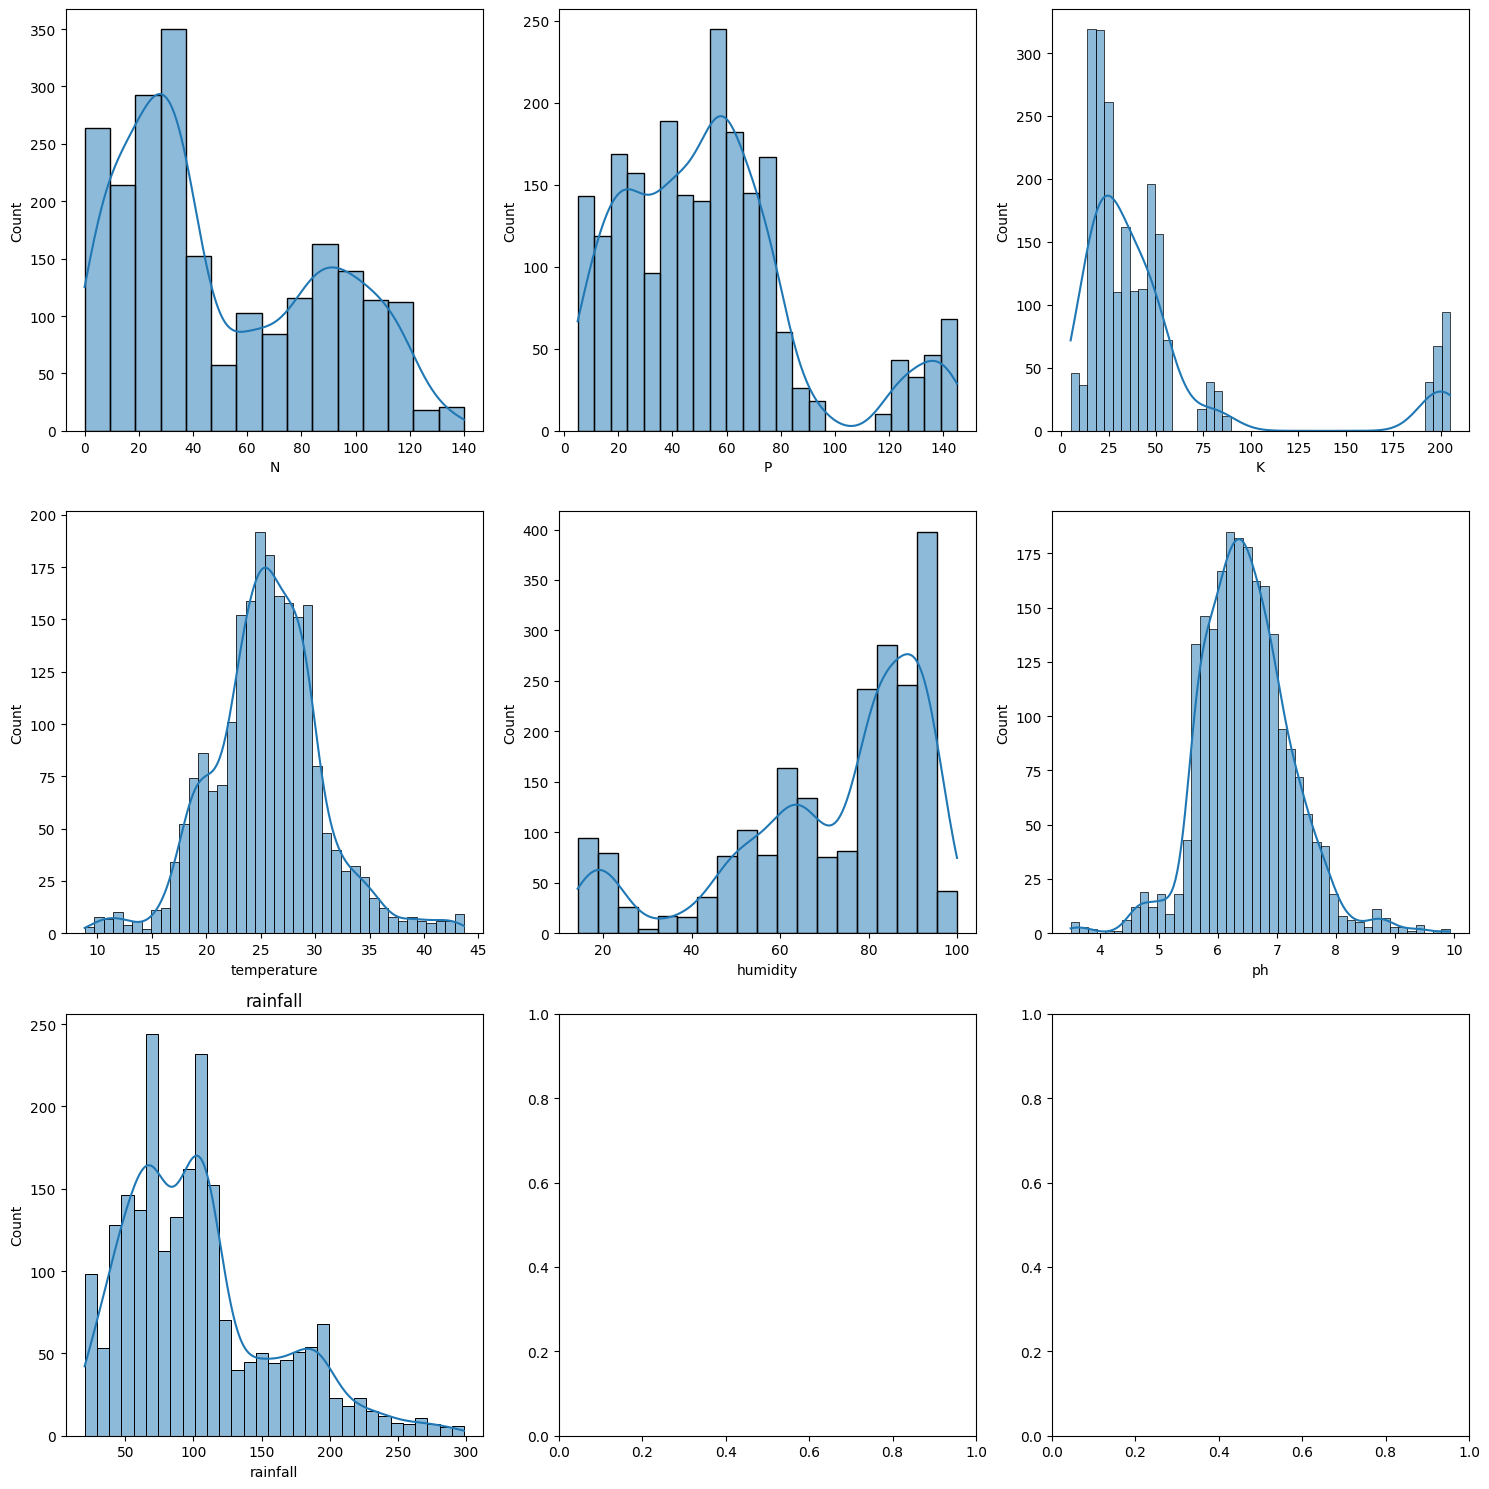

In [109]:
#plotting scatter plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
 sns.histplot(crop[i], ax=subplot, kde=True)
subplot.set_title(i)
plt.tight_layout()
plt.show()

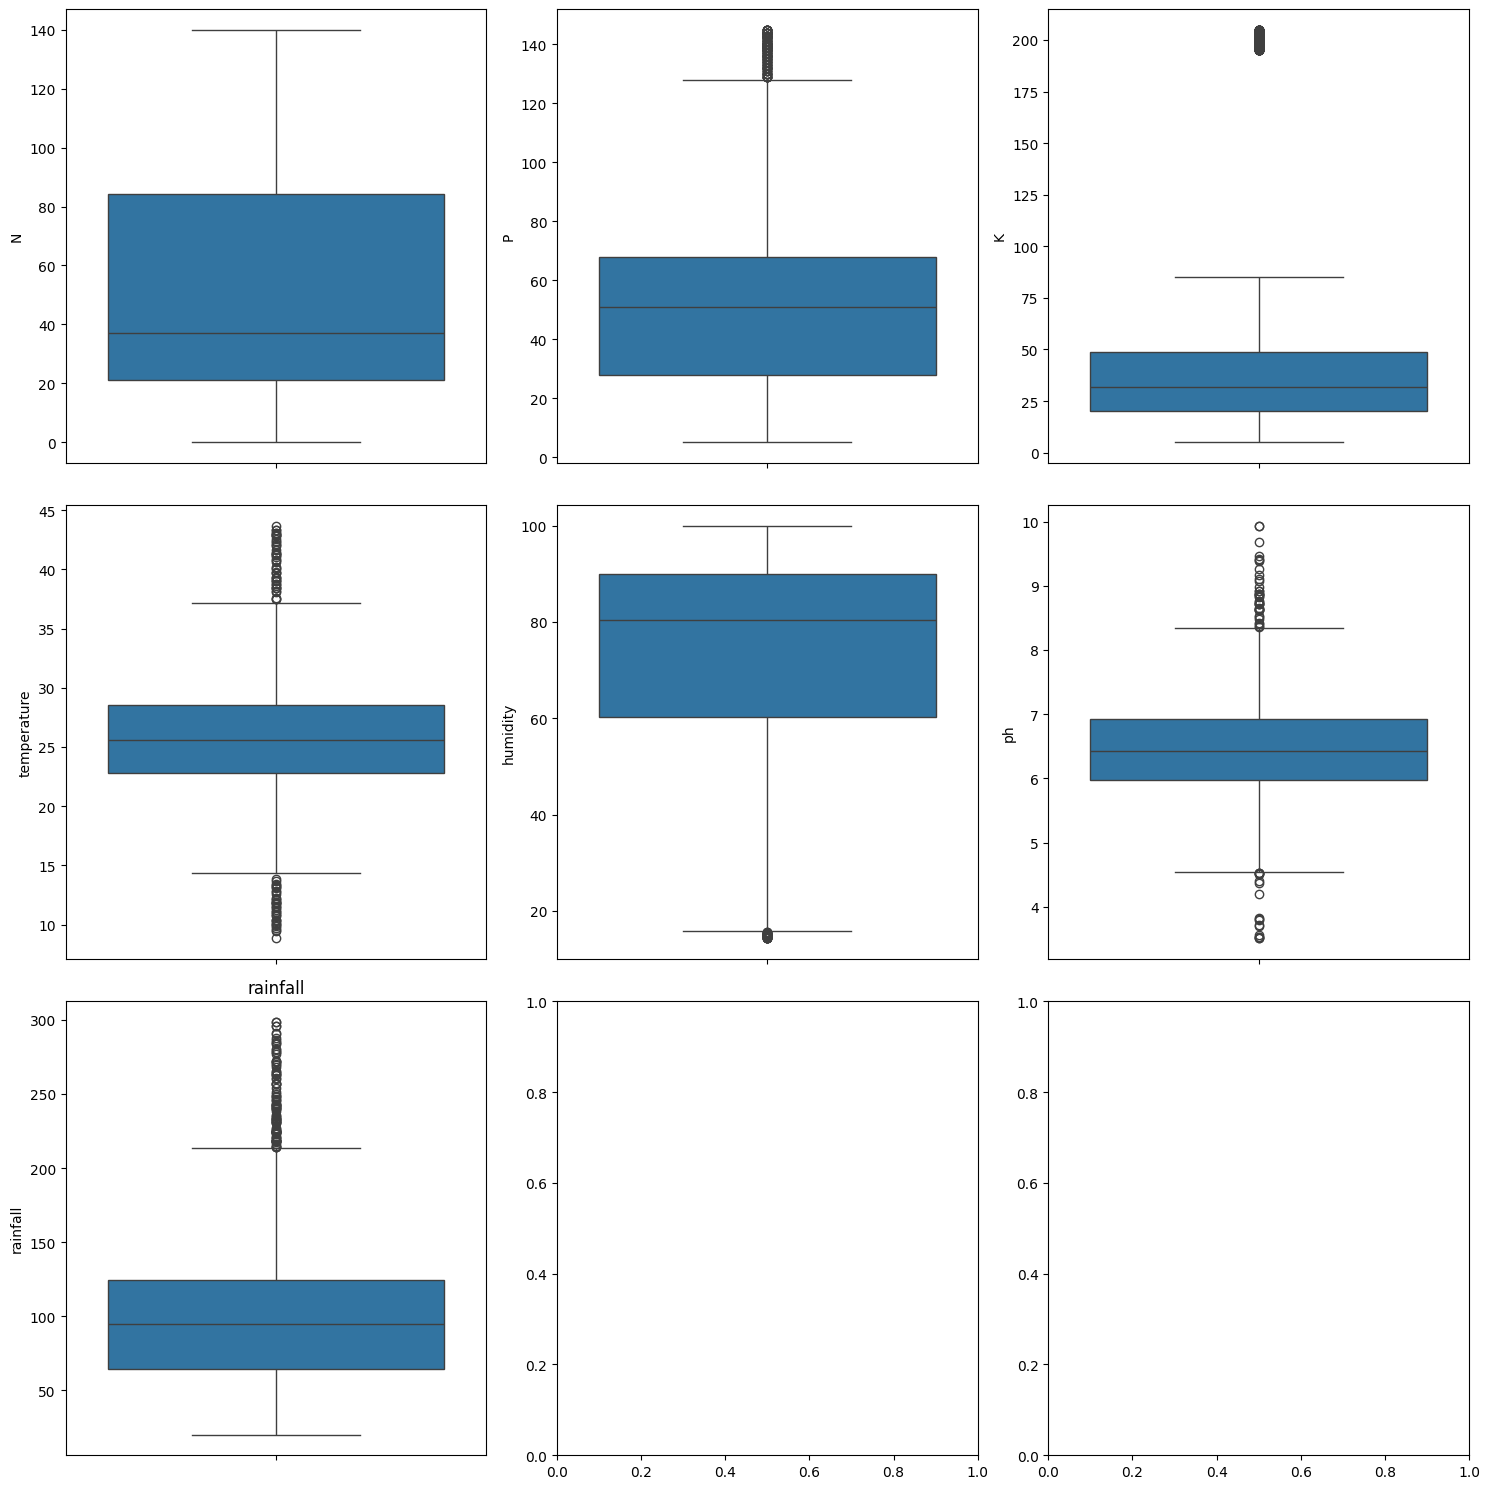

In [110]:
#finding outlier
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
 sns.boxplot(crop[i], ax=subplot)
subplot.set_title(i)
plt.tight_layout()
plt.show()

In [111]:
#correlation of the features
num_cols=crop.select_dtypes(include=[np.number])
num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [112]:
corr =num_cols.corr()
print(corr)

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


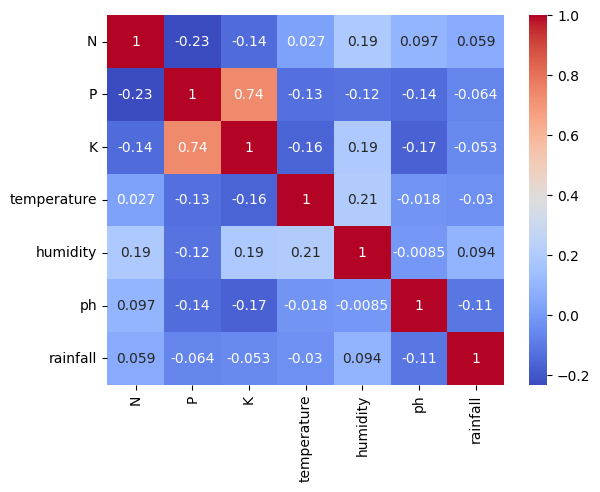

In [113]:
#visualizing with heat map
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

### Encoding

In [114]:
crop_dict={
        'rice':0, 
         'maize':1, 
        'chickpea':2, 
        'kidneybeans':3, 
        'pigeonpeas':4,
        'mothbeans':5,
        'mungbean':6, 
        'blackgram':7, 
        'lentil':8,
        'pomegranate':9,
        'banana':10, 
        'mango':11,
        'grapes':12,
        'watermelon':13,
        'muskmelon':14, 
        'apple':15,
        'orange':16,
       'papaya':17,
       'coconut':18,
       'cotton':29,
       'jute':20,
       'coffee':21
}

In [115]:
crop['crop_no']=crop['label'].map(crop_dict)


In [116]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0


In [117]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
crop_no        0
dtype: int64

In [118]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,21
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,21


In [119]:
crop.drop('label', axis=1,inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,21


# Train Test Split

In [120]:
#Train Test Split
x =crop.drop('crop_no',axis=1)
y=crop['crop_no']

In [121]:
x.shape

(2200, 7)

In [122]:
y.shape

(2200,)

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [124]:
x_train.shape

(1760, 7)

In [125]:
x_test.shape

(440, 7)

In [126]:
y_train.shape

(1760,)

In [127]:
y_test.shape

(440,)

# Scaling

In [128]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [129]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



In [130]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [131]:
y_pred = dtc.predict(x_test_scaled)
acs = accuracy_score(y_test, y_pred)
print('Accuracy Score', acs)

Accuracy Score 0.9840909090909091


In [132]:
# Prediction
import numpy as np
def crop_rec(N, P, K, temp, hum, ph, rainfall):
    features = np.array([[N, P, K, temp, hum, ph, rainfall]])
    transformed_features = scaler.transform(features)
    prediction = dtc. predict(transformed_features).reshape(1, -1)
    crop_dict = {
        0:'rice', 
        1:'maize', 
        2:'chickpea', 
        3:'kidneybeans', 
        4:'pigeonpeas',
        5:'mothbeans',
        6:'mungbean', 
        7:'blackgram', 
        8:'lentil',
        9:'pomegranate',
        10:'banana', 
        11:'mango',
        12:'grapes',
        13:'watermelon',
        14:'muskmelon', 
        15:'apple',
        16:'orange',
       17:'papaya',
       18:'coconut',
       19:'cotton',
       20:'jute',
       21:'coffee'
    }
    crop = [crop_dict[i] for i in prediction[0]]
    return f"{crop} is a best crop to grow in the farm"
    

In [133]:
# Predicting With the values
N = 90
P = 42
K = 43
temp = 20
hum = 82
ph = 6.1
rainfall = 202

crop_rec(N, P, K, temp, hum, ph, rainfall)

C:\Users\SHITAL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


"['rice'] is a best crop to grow in the farm"